Approximated Eigenvector - First Component
[-0.12494283  0.50049984 -0.40658603  0.48288751 -0.18805402  0.475689
 -0.27162229]
Approximated PCA 1
[ 1.06218935  0.66883454 -2.56278444 -1.24705068  0.16426583  0.93800429
 -2.44288389  0.20671797  0.58166064 -0.98216775 -1.37170614  1.55503706
  1.77635657  0.83782722 -2.2645261  -1.50252905  3.41569713  1.80695773
  2.06855455 -1.44531461 -0.51691852 -0.76885506 -0.06616299  0.16074097
  0.86903802  3.22254872 -4.49818122  0.33464985]
Eigenvector - First Component
[ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]
PCA 1
[-1.06225512 -0.6688211   2.56285012  1.24726141 -0.16419646 -0.93797874
  2.44290749 -0.20676891 -0.58171902  0.98244396  1.37172691 -1.55518187
 -1.77632183 -0.8378493   2.26450539  1.50252828 -3.41575532 -1.80689657
 -2.06855257  1.44525321  0.51700619  0.76885732  0.06632628 -0.16081596
 -0.86915616 -3.22245361  4.49773395 -0.33467796]


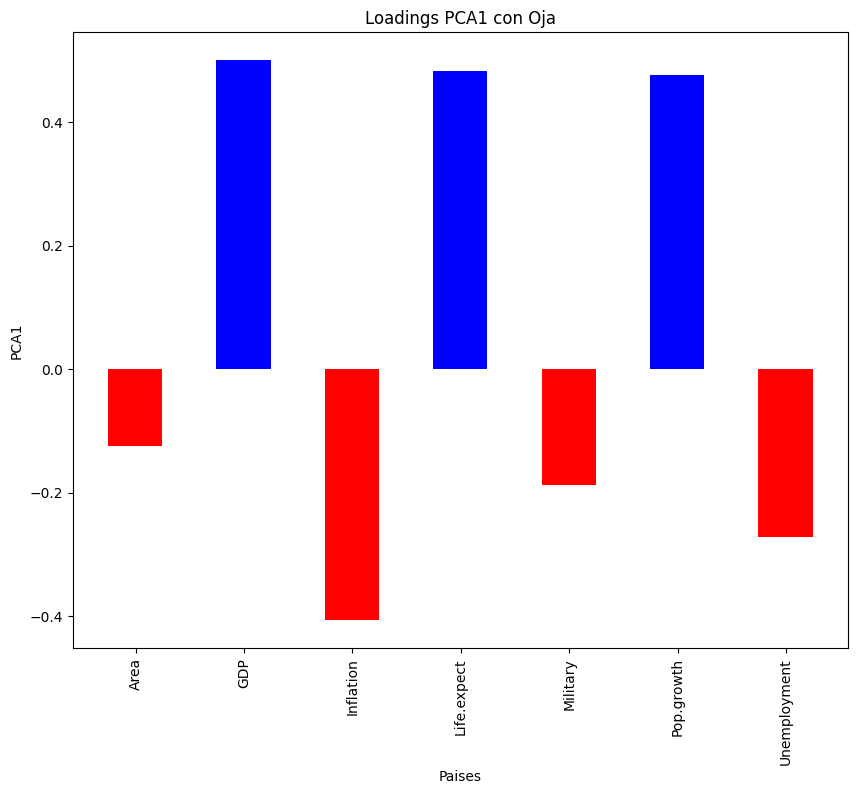

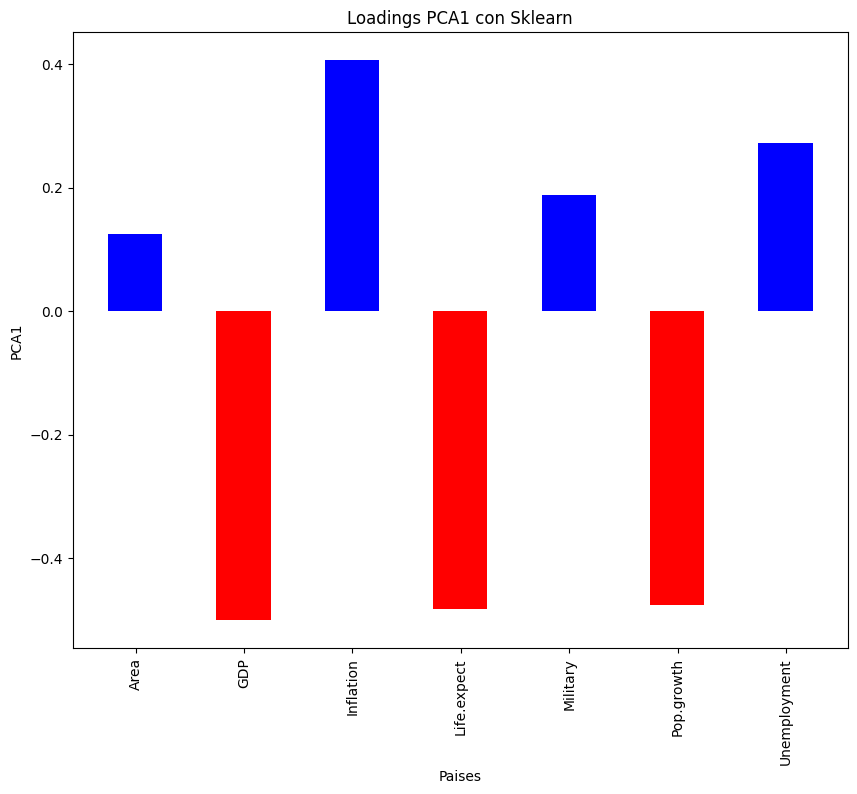

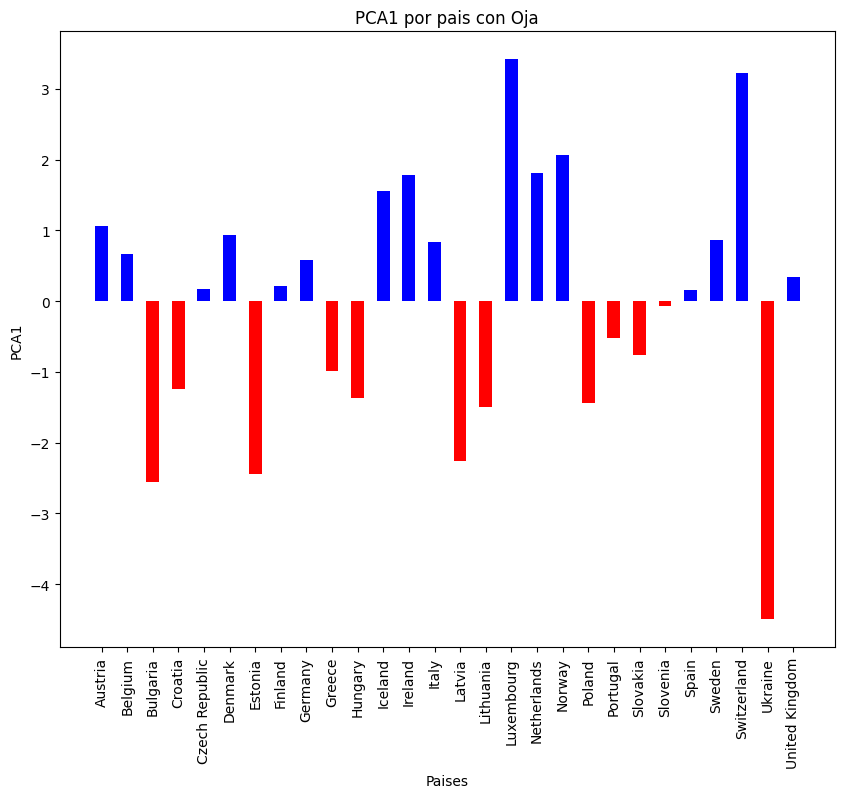

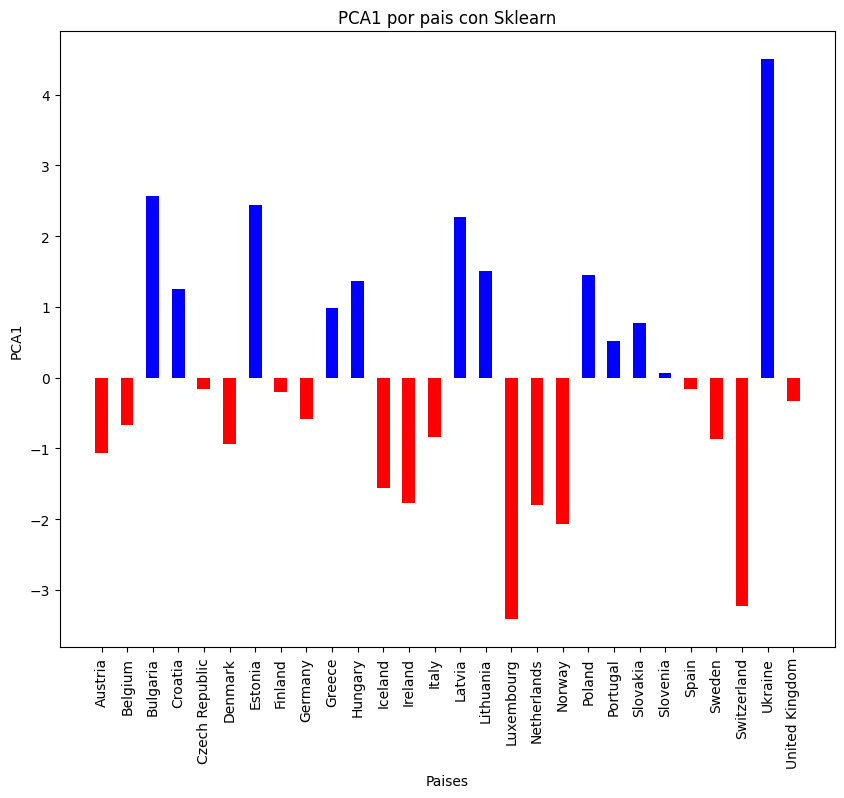

In [5]:
from src.utils import standarize_data
from src.parser_files import get_csv_data
from src.networks.Oja import Oja
from src.plots import *
from sklearn.decomposition import PCA
import pandas as pd

LEARNING_RATE = 0.00001
EPOCHS = 100000

data, countries, labels = get_csv_data("data/europe.csv")
data_standarized = standarize_data(data)

oja = Oja(data_standarized, LEARNING_RATE, EPOCHS)
weights = oja.train()

print("Approximated Eigenvector - First Component")
print(weights)
print("Approximated PCA 1")
pca_aproximated = np.matmul(data_standarized, weights)
print(pca_aproximated)

pca = PCA()
principal_components = pca.fit_transform(data_standarized)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

print("Eigenvector - First Component")
print(pca.components_.T[:, 0])
print("PCA 1")
print(principal_components[:, 0])

plot_pca(weights, labels, "Loadings PCA1 con Oja")
plot_pca(pca.components_[0], labels, "Loadings PCA1 con Sklearn")
plot_pca(pca_aproximated, countries, "PCA1 por pais con Oja")
plot_pca(principal_components[:, 0], countries, "PCA1 por pais con Sklearn")

In [6]:
data = {'OJA': np.round(list(weights),4), 'SKLEARN': np.round(list(pca.components_.T[:, 0]),4)}
df = pd.DataFrame(data, index=labels).transpose().applymap(lambda x: f'{x:.4f}')
df.head().style

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
OJA,-0.1249,0.5005,-0.4066,0.4829,-0.1881,0.4757,-0.2716
SKLEARN,0.1249,-0.5005,0.4065,-0.4829,0.1881,-0.4757,0.2717


In [7]:
data = {'OJA': np.round(list(pca_aproximated),4), 'SKLEARN': np.round(list(principal_components[:, 0]),4)}
df2 = pd.DataFrame(data, index=countries).transpose().applymap(lambda x: f'{x:.4f}')
df2.head().style

,Austria,Belgium,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,Germany,Greece,Hungary,Iceland,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
OJA,1.0622,0.6688,-2.5628,-1.2471,0.1643,0.9380,-2.4429,0.2067,0.5817,-0.9822,-1.3717,1.5550,1.7764,0.8378,-2.2645,-1.5025,3.4157,1.8070,2.0686,-1.4453,-0.5169,-0.7689,-0.0662,0.1607,0.8690,3.2225,-4.4982,0.3346
SKLEARN,-1.0623,-0.6688,2.5629,1.2473,-0.1642,-0.9380,2.4429,-0.2068,-0.5817,0.9824,1.3717,-1.5552,-1.7763,-0.8378,2.2645,1.5025,-3.4158,-1.8069,-2.0686,1.4453,0.5170,0.7689,0.0663,-0.1608,-0.8692,-3.2225,4.4977,-0.3347


Varianza de cada componente principal
[0.46102367 0.16958906 0.15188436 0.11005085 0.06540695 0.02409627
 0.01794884]
Varianza acumulada
[0.46102367 0.63061273 0.78249709 0.89254794 0.95795489 0.98205116
 1.        ]


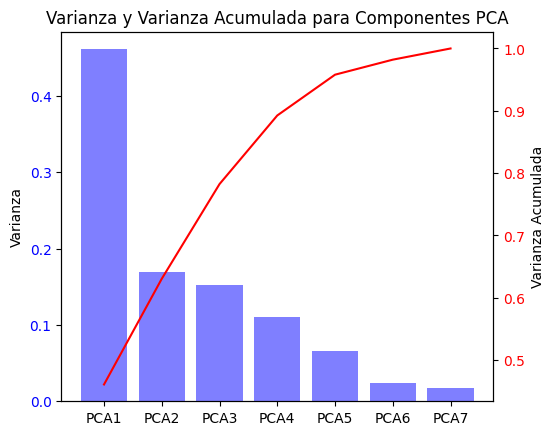

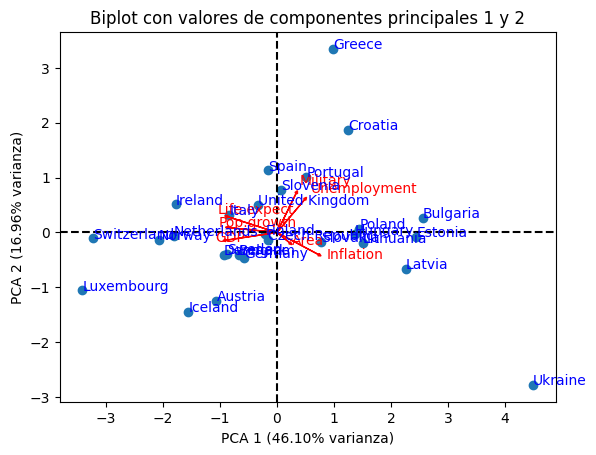

In [8]:
plot_variance(pca)
plot_biplot(pca, principal_components, loadings, countries, labels)

In [10]:
V = [0.46102367, 0.16958906, 0.15188436, 0.11005085, 0.06540695, 0.02409627, 0.01794884]
V_ACUM = [0.46102367, 0.63061273, 0.78249709, 0.89254794, 0.95795489, 0.98205116, 1.]
pca_labels = [f'PCA{i+1}' for i in range(len(V))]

data = {'Varianza': np.round(V,4), 'Varianza acumulada': np.round(V_ACUM,4)}
df = pd.DataFrame(data, index=pca_labels).transpose().applymap(lambda x: f'{x:.4f}')
df.head().style

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
Varianza,0.4610,0.1696,0.1519,0.1101,0.0654,0.0241,0.0179
Varianza acumulada,0.4610,0.6306,0.7825,0.8925,0.9580,0.9821,1.0000
